# My First Convolutional Neural Network : Fashion MNIST
---
#### 실습목표
1. CNN의 기본 아이디어를 안다.
2. CNN의 구조를 그리고, 코드로 옮길 수 있다.

## Real Game : CNN on Fashion MNIST

여기에서는 여러분이 직접 코드를 완성해야 하는 문제가 곳곳에 있습니다!

In [29]:
'''
라이브러리들을 불러오자.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras

### Data Loading

In [30]:
(train_x, train_y), (test_x, test_y) = keras.datasets.fashion_mnist.load_data()

In [31]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [32]:
labels = ["T-shirt/top",  # index 0
            "Trouser",      # index 1
            "Pullover",     # index 2 
            "Dress",        # index 3 
            "Coat",         # index 4
            "Sandal",       # index 5
            "Shirt",        # index 6 
            "Sneaker",      # index 7 
            "Bag",          # index 8 
            "Ankle boot"]   # index 9

print(labels)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


id = 4161
다음 그림은 Pullover 입니다.


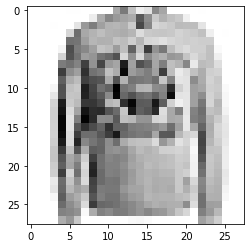

In [33]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 {labels[test_y[id]]} 입니다.')

plt.imshow(test_x[id], cmap='Greys')
plt.show()

### X : Min-Max Scaling

- 최소값 0, 최대값 1로 통일하는 스케일링

In [34]:
max_n = train_x.max()
min_n = train_x.min()

In [35]:
max_n, min_n

(255, 0)

In [36]:
train_x = (train_x-min_n)/(max_n-min_n)
train_x = (train_x-min_n)/(max_n-min_n)

### X : Reshape(# of data, 28, 28, 1)

- **끝에 1을 달아서 그레이스케일(흑백)을 명시해준다.**

In [37]:
_, b, c = train_x.shape
print(b,c)

28 28


In [38]:
train_x = train_x.reshape(train_x.shape[0], b, c, 1)
test_x = test_x.reshape(test_x.shape[0], b, c, 1)

print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)


### Y : One-Hot Encoding

In [40]:
u = len(np.unique(train_y))

In [41]:
from tensorflow.keras.utils import to_categorical
train_y = to_categorical(train_y,u)
test_y = to_categorical(test_y,u)

### 코드를 완성해주세요!

- **자유롭게 먼저 해보는 것을 추천**
---
- **구조를 따라서 코딩을 한다면..**

    1. 인풋 레이어
    2. Convolution : 필터수 32개, 사이즈(3, 3), same padding
    3. BatchNormalization
    4. Convolution : 필터수 32개, 사이즈(3, 3), same padding
    5. BatchNormalization
    6. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
    7. DropOut : 25% 비활성화
    8. Convolution : 필터수 64개, 사이즈(3, 3), same padding
    9. BatchNormalization
    10. Convolution : 필터수 64개, 사이즈(3, 3), same padding
    11. BatchNormalization
    12. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
    13. DropOut : 25% 비활성화
    14. Flatten
    15. Fully Connected Layer : 노드 512개
    16. BatchNormalization
    17. 아웃풋 레이어

In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D, MaxPool2D

In [49]:
tf.keras.backend.clear_session()

model = Sequential()

model.add(Input(shape=(28,28,1)))

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 strides=(1,1),
                 padding='same',
                 activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 strides=(1,1),
                 padding='same',
                 activation='relu'))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 64)                802880    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                        

In [51]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=5,
                   verbose=1,
                   restore_best_weights=True)

In [53]:
history = model.fit(train_x, train_y, validation_split=0.2, verbose=1, epochs=1000, batch_size=1024, callbacks=[es])

Epoch 1/1000
47/47 [==============================] - 2s 32ms/step - loss: 0.4706 - accuracy: 0.8344 - val_loss: 0.4829 - val_accuracy: 0.8296
Epoch 2/1000
47/47 [==============================] - 1s 31ms/step - loss: 0.4634 - accuracy: 0.8375 - val_loss: 0.4737 - val_accuracy: 0.8317
Epoch 3/1000
47/47 [==============================] - 1s 32ms/step - loss: 0.4587 - accuracy: 0.8390 - val_loss: 0.4774 - val_accuracy: 0.8347
Epoch 4/1000
47/47 [==============================] - 1s 31ms/step - loss: 0.4500 - accuracy: 0.8423 - val_loss: 0.4519 - val_accuracy: 0.8407
Epoch 5/1000
47/47 [==============================] - 2s 33ms/step - loss: 0.4454 - accuracy: 0.8432 - val_loss: 0.4484 - val_accuracy: 0.8453
Epoch 6/1000
47/47 [==============================] - 1s 30ms/step - loss: 0.4415 - accuracy: 0.8454 - val_loss: 0.4546 - val_accuracy: 0.8410
Epoch 7/1000
47/47 [==============================] - 1s 30ms/step - loss: 0.4323 - accuracy: 0.8482 - val_loss: 0.4386 - val_accuracy: 0.8457

### Early Stopping을 활용한 학습

- 조건
    1. validation_split = 0.2
    2. 1 epochs만 관찰해가며 속도가 가장 빠른 batch_size 찾아보기. 128개부터 시작하여 조절해볼 것.
    3. EarlyStopping. val_loss가 5 epoch 전과 비교하여 개선되지 않으면 스탑
    4. 이미지 시각화를 위해 hist 변수에 학습 과정을 넣어주세요.

In [54]:
hist = history

### 이미지 시각화

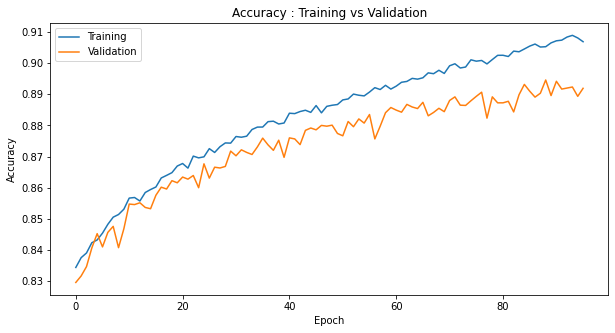

In [55]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

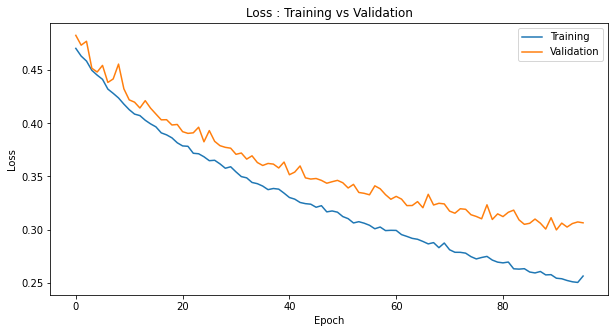

In [56]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

In [57]:
y_pred = model.predict(test_x)
y_pred.shape

313/313 [==============================] - 1s 3ms/step


(10000, 10)

In [58]:
single_y_pred = y_pred.argmax(axis=1)
single_y_pred.shape

(10000,)

In [59]:
print(test_y.shape)
single_test_y = test_y.argmax(axis=1)
print(single_test_y.shape)

(10000, 10)
(10000,)


In [60]:
test_acc = accuracy_score(single_test_y, single_y_pred)

print(f'테스트셋 정확도 : {test_acc*100:.2f}%' )

테스트셋 정확도 : 32.23%


id = 1090
다음 그림은 숫자 5 입니다.
모델의 예측 : 5
모델의 카테고리별 확률 : [  0.   0.   0.   0.   0. 100.   0.   0.   0.   0.]
정답입니다


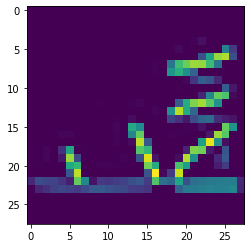

In [61]:
'''
성능 확인을 위해
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 숫자 {single_test_y[id]} 입니다.')
print(f'모델의 예측 : {single_y_pred[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(y_pred[id]*100)}')

if single_test_y[id] == single_y_pred[id] :
    print('정답입니다')
else : 
    print('틀렸어요')
    
plt.imshow(test_x[id].reshape([28,-1]))
plt.show()

id = 4960
다음 그림은 숫자 9 입니다.
모델의 예측 : 5
모델의 카테고리별 확률 : [  0.   0.   0.   0.   0. 100.   0.   0.   0.   0.]
틀렸어요


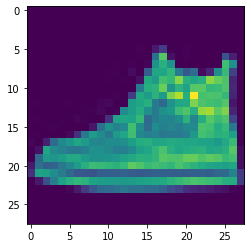

In [62]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (single_test_y==single_y_pred)
f_id = np.where(true_false==False)[0]        # 틀린 것들의 인덱스 반환
f_n = len(f_id)                              # 틀린 것들이 총 몇 개나 될까?

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}')
print(f'다음 그림은 숫자 {single_test_y[id]} 입니다.')
print(f'모델의 예측 : {single_y_pred[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(y_pred[id]*100)}')

if single_test_y[id] == single_y_pred[id] :
    print('정답입니다')
else : 
    print('틀렸어요')
    
plt.imshow(test_x[id].reshape([28,-1]))
plt.show()